In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")
import seaborn as sns

In [2]:
data=pd.read_csv("D:/semester 6/data mining/footprint.csv",sep=";",decimal=",") #read data

In [3]:
data

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86475,Luxembourg,LUX,Europe,Western Europe,1999,EFExportsTotGHA,2.727690e+05,38693.594850,529781.310300,38598.597570,0.000000,4.697928e+06,5.577771e+06,87516.400,446000
86476,Luxembourg,LUX,Europe,Western Europe,1999,EFImportsPerCap,9.640340e-01,0.513370,2.175907,0.182401,0.000000,1.672241e+01,2.055812e+01,87516.400,446000
86477,Luxembourg,LUX,Europe,Western Europe,1999,EFImportsTotGHA,4.299939e+05,228981.371100,970532.711500,81357.251260,0.000000,7.458795e+06,9.169660e+06,87516.400,446000
86478,Luxembourg,LUX,Europe,Western Europe,1999,EFProdPerCap,4.959092e-01,0.093481,0.448416,0.000000,0.115181,6.242095e+00,7.395082e+00,87516.400,446000


In [4]:
data.info() #data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86480 entries, 0 to 86479
Data columns (total 15 columns):
country                     86480 non-null object
ISO alpha-3 code            85660 non-null object
UN_region                   86480 non-null object
UN_subregion                86480 non-null object
year                        86480 non-null int64
record                      86480 non-null object
crop_land                   62450 non-null float64
grazing_land                62990 non-null float64
forest_land                 62990 non-null float64
fishing_ground              62990 non-null float64
built_up_land               62990 non-null float64
carbon                      62990 non-null float64
total                       86480 non-null float64
Percapita GDP (2010 USD)    71410 non-null float64
population                  86480 non-null int64
dtypes: float64(8), int64(2), object(5)
memory usage: 9.9+ MB


In [5]:
data.isnull().sum() #sum of missing value

country                         0
ISO alpha-3 code              820
UN_region                       0
UN_subregion                    0
year                            0
record                          0
crop_land                   24030
grazing_land                23490
forest_land                 23490
fishing_ground              23490
built_up_land               23490
carbon                      23490
total                           0
Percapita GDP (2010 USD)    15070
population                      0
dtype: int64

In [6]:
from scipy import stats #outlier
z=np.abs(stats.zscore(data._get_numeric_data()))
print(z)

[[0.18053136        nan        nan ... 0.1749262         nan 0.24247742]
 [0.18053136        nan        nan ... 0.16538559        nan 0.24247742]
 [0.18053136        nan        nan ... 0.17492619        nan 0.24247742]
 ...
 [0.63244579        nan        nan ... 0.11558381        nan 0.26835528]
 [0.63244579        nan        nan ... 0.17492615        nan 0.26835528]
 [0.63244579        nan        nan ... 0.1535798         nan 0.26835528]]


In [7]:
outlier=data[(z<3).all(axis=1)]
print(outlier.shape) #jumlah data tidak outlier

(0, 15)


C:\Users\User-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [8]:
c=pd.DataFrame([])
c["Keterangan:"]=["tidak ada outlier","outlier"]
c["jumlah observasi"]=[83666,86480-83666]
c

,Keterangan:,jumlah observasi
0,tidak ada outlier,83666
1,outlier,2814


In [9]:
data['grazing_land']=data['grazing_land'].fillna(data['grazing_land'].median()) #mengatasi missing value

In [10]:
data['forest_land']=data['forest_land'].fillna(data['forest_land'].median())

In [11]:
data['fishing_ground']=data['fishing_ground'].fillna(data['fishing_ground'].median())
data['built_up_land']=data['built_up_land'].fillna(data['built_up_land'].median())
data['carbon']=data['carbon'].fillna(data['carbon'].median())
data['total']=data['total'].fillna(data['total'].median())
data['Percapita GDP (2010 USD)']=data['Percapita GDP (2010 USD)'].fillna(data['Percapita GDP (2010 USD)'].median())
data['population']=data['population'].fillna(data['population'].median())
data['ISO alpha-3 code']=data['ISO alpha-3 code'].fillna(data['ISO alpha-3 code'].mode())

In [12]:
data['crop_land']=data['crop_land'].fillna(data['crop_land'].median())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86480 entries, 0 to 86479
Data columns (total 15 columns):
country                     86480 non-null object
ISO alpha-3 code            85660 non-null object
UN_region                   86480 non-null object
UN_subregion                86480 non-null object
year                        86480 non-null int64
record                      86480 non-null object
crop_land                   86480 non-null float64
grazing_land                86480 non-null float64
forest_land                 86480 non-null float64
fishing_ground              86480 non-null float64
built_up_land               86480 non-null float64
carbon                      86480 non-null float64
total                       86480 non-null float64
Percapita GDP (2010 USD)    86480 non-null float64
population                  86480 non-null int64
dtypes: float64(8), int64(2), object(5)
memory usage: 9.9+ MB


In [14]:
data.describe() #statdes

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
count,86480.000000,8.648000e+04,8.648000e+04,8.648000e+04,8.648000e+04,8.648000e+04,8.648000e+04,8.648000e+04,8.648000e+04,8.648000e+04
mean,1989.203631,5.025613e+06,2.173663e+06,5.230006e+06,1.326571e+06,5.140968e+05,9.513145e+06,2.702981e+07,9.003346e+04,3.158733e+07
std,15.489748,2.984767e+07,1.201368e+07,4.416226e+07,7.550896e+06,4.881474e+06,8.785236e+07,1.545221e+08,2.117008e+06,1.160458e+08
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.481944e-03,5.000000e+03
25%,1976.000000,4.410595e-01,2.032388e-01,3.431425e-01,8.488498e-02,0.000000e+00,1.071981e-01,1.298505e+00,1.250162e+03,1.989000e+06
50%,1990.000000,2.841671e+00,2.691697e+00,3.060057e+00,3.504151e+00,3.250888e-02,1.303677e+00,3.848886e+01,3.093880e+03,6.532000e+06
75%,2003.000000,6.713167e+05,1.605776e+05,2.208926e+05,4.454481e+04,8.289606e-02,1.508199e+05,7.631609e+06,8.221035e+03,2.004700e+07
max,2014.000000,8.148728e+08,2.022626e+08,1.495331e+09,1.731391e+08,1.715442e+08,3.688446e+09,5.212416e+09,7.848975e+07,1.400602e+09


In [15]:
data.groupby(["year","country"],as_index=True).agg({"population":sum})

population
year country                
1961 Afghanistan    91650000
     Albania        16860000
     Algeria       114050000
     Angola         53670000
     Argentina     209530000
...                      ...
2014 Venezuela     306940000
     Viet Nam      924230000
     Yemen         261840000
     Zambia        157210000
     Zimbabwe      152460000

[8540 rows x 1 columns]

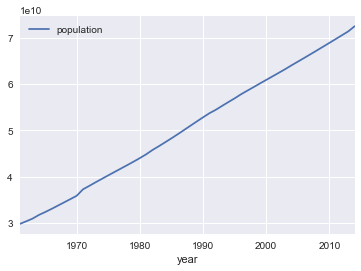

In [16]:
data.groupby("year",as_index=True).agg({"population":sum}).plot(kind="line")

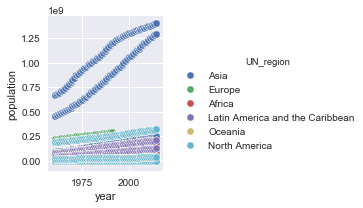

In [17]:
g = sns.FacetGrid(data, hue='UN_region',margin_titles=True) #scatter plot year and population

(g.map(plt.scatter,"year","population", edgecolor="w")).add_legend()

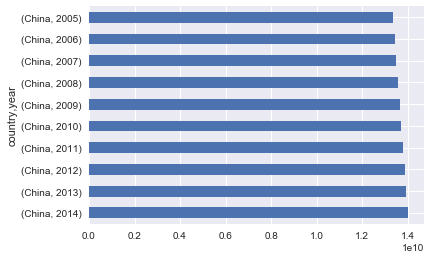

In [18]:
data.groupby(['country','year']).population.sum().nlargest(10).plot(kind='barh') #bar chart of first 10 largest population

In [20]:
data[['country', 'carbon','year']].sort_values(by = 'carbon',ascending = False).head(10) #table of first 10 largest carbon

,country,carbon,year
85689,China,3.688446e+09,2013
85699,China,3.661936e+09,2014
85683,China,3.639495e+09,2013
85693,China,3.613649e+09,2014
85679,China,3.547482e+09,2012
85669,China,3.537864e+09,2011
85673,China,3.505431e+09,2012
85663,China,3.467098e+09,2011
85659,China,3.262502e+09,2010
85653,China,3.204093e+09,2010


In [21]:
data[['country', 'crop_land','year']].sort_values(by = 'crop_land',ascending = False).head(10)

,country,crop_land,year
85693,China,814872818.0,2014
85683,China,814102845.7,2013
85673,China,802771657.9,2012
85653,China,759565730.5,2010
85663,China,755530214.4,2011
85643,China,734699187.1,2009
85633,China,707667121.4,2008
85691,China,672626323.1,2014
85699,China,672626323.1,2014
85613,China,671829801.3,2006


In [23]:
data[['country', 'built_up_land','year']].sort_values(by = 'built_up_land',ascending = False).head(15) #table of first 10 largest build_up_land

,country,built_up_land,year
85693,China,171544177.5,2014
85691,China,171544177.5,2014
85699,China,171544177.5,2014
85689,China,169794072.5,2013
85681,China,169794072.5,2013
85683,China,169794072.5,2013
85679,China,167913147.2,2012
85673,China,167913147.2,2012
85671,China,167913147.2,2012
85669,China,163006937.1,2011


In [24]:
china=data[data.country=="China"] #mengambil data negara china saja

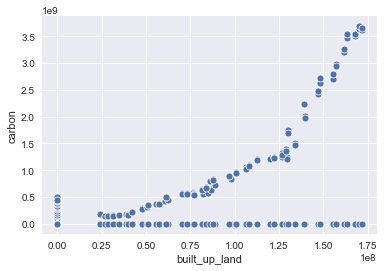

In [25]:
sns.scatterplot("built_up_land","carbon",data=china)

In [26]:
datakor=data[["year","crop_land","grazing_land","forest_land","fishing_ground","built_up_land","carbon","total","Percapita GDP (2010 USD)","population"]]

In [27]:
korelasi=datakor.corr()

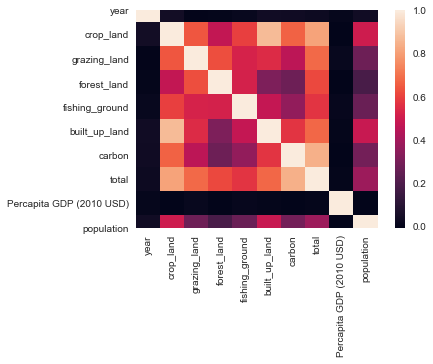

In [28]:
sns.heatmap(korelasi, square = True)

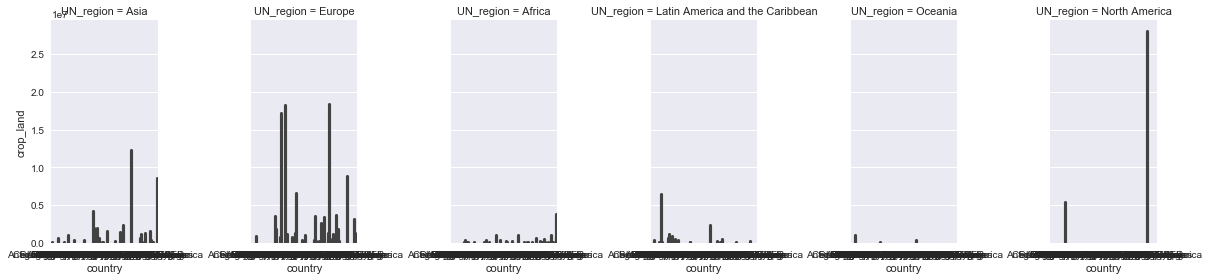

In [29]:
from numpy import median
ax = sns.catplot(x="country", y="crop_land",col='UN_region', data=data, estimator=median,height=4, aspect=.7,kind='bar')

In [30]:
data[['country','UN_region','carbon','year']].sort_values(by = 'carbon',ascending = True).head(10) #10 carbon terendah

,country,UN_region,carbon,year
0,Armenia,Asia,0.0,1992
12830,Central African Republic,Africa,0.0,1977
12831,Central African Republic,Africa,0.0,1977
44270,Liberia,Africa,0.0,1996
12840,Central African Republic,Africa,0.0,1978
12841,Central African Republic,Africa,0.0,1978
44261,Liberia,Africa,0.0,1995
44260,Liberia,Africa,0.0,1995
12850,Central African Republic,Africa,0.0,1979
12851,Central African Republic,Africa,0.0,1979


In [31]:
data[['country', 'forest_land','year']].sort_values(by = 'forest_land',ascending = False).head(10) #negara dengan 10 lahan terbesar

,country,forest_land,year
8061,Brazil,1.495331e+09,1961
8371,Brazil,1.493777e+09,1992
8311,Brazil,1.493630e+09,1986
8331,Brazil,1.493615e+09,1988
8321,Brazil,1.493546e+09,1987
8341,Brazil,1.492969e+09,1989
8071,Brazil,1.491587e+09,1962
8381,Brazil,1.490251e+09,1993
8351,Brazil,1.486838e+09,1990
8081,Brazil,1.485710e+09,1963


In [32]:
record=data["record"].value_counts() #jumlah jenis record

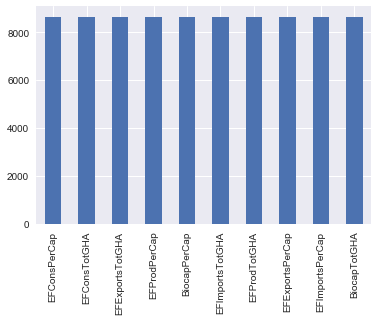

In [33]:
record.plot(kind="bar")

In [36]:
data1=data[data['carbon']>0.5]

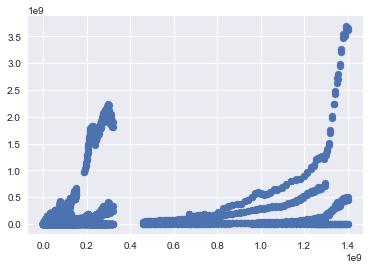

In [37]:
plt.scatter(data1["population"],data1["carbon"])

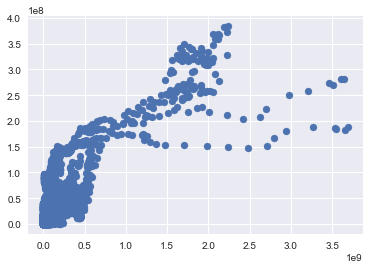

In [38]:
plt.scatter(data1["carbon"],data1["forest_land"])

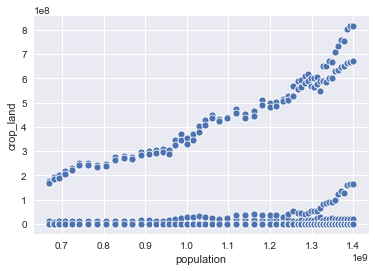

In [39]:
sns.scatterplot("population","crop_land",data=china)

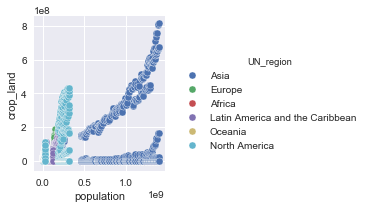

In [40]:
g = sns.FacetGrid(data, hue='UN_region',margin_titles=True)

(g.map(plt.scatter,"population","crop_land", edgecolor="w")).add_legend()

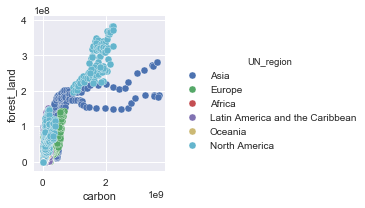

In [41]:
g = sns.FacetGrid(data1, hue='UN_region',margin_titles=True)

(g.map(plt.scatter,"carbon","forest_land", edgecolor="w")).add_legend()

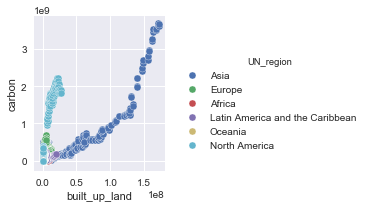

In [42]:
g = sns.FacetGrid(data1, hue='UN_region',margin_titles=True)

(g.map(plt.scatter,"built_up_land","carbon", edgecolor="w")).add_legend()

In [43]:
data2=data1[data1['crop_land']>1]

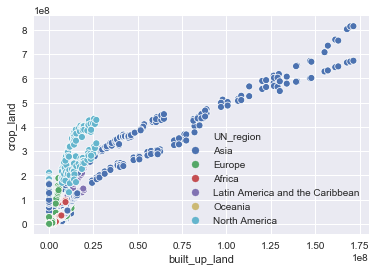

In [44]:
sns.scatterplot("built_up_land","crop_land",hue='UN_region',data=data2)

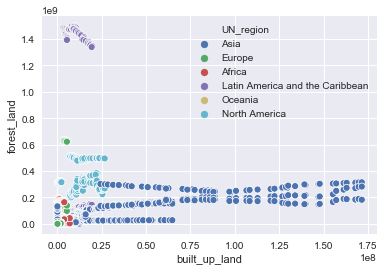

In [45]:
sns.scatterplot("built_up_land","forest_land",hue='UN_region',data=data)

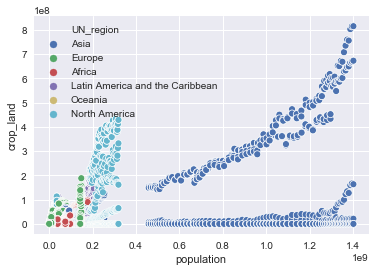

In [46]:
sns.scatterplot("population","crop_land",hue='UN_region',data=data)

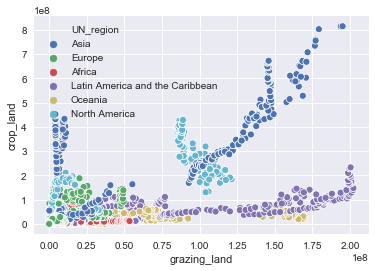

In [47]:
sns.scatterplot("grazing_land","crop_land",hue='UN_region',data=data)

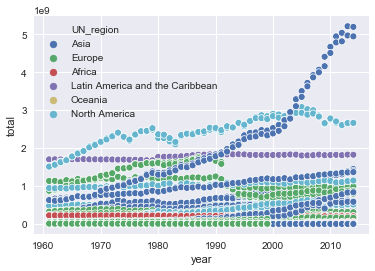

In [48]:
sns.scatterplot("year","total",hue='UN_region',data=data)

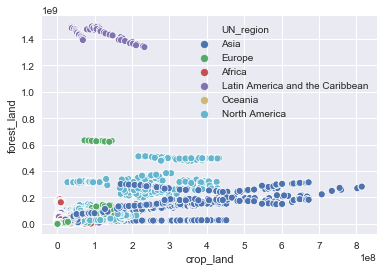

In [49]:
sns.scatterplot("crop_land","forest_land",hue='UN_region',data=data)

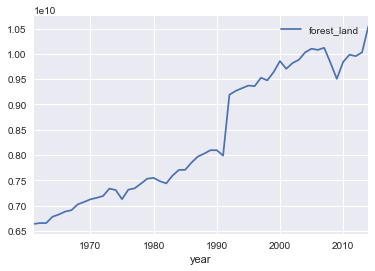

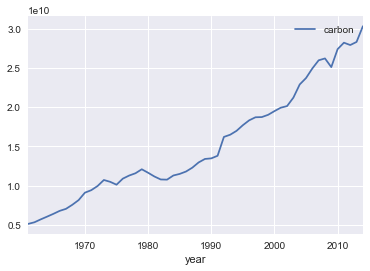

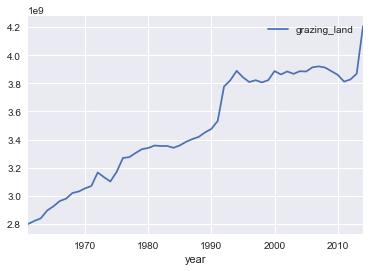

In [50]:
data.groupby("year",as_index=True).agg({"forest_land":sum}).plot(kind="line")
data.groupby("year",as_index=True).agg({"carbon":sum}).plot(kind="line")
data.groupby("year",as_index=True).agg({"grazing_land":sum}).plot(kind="line")
#df.groupby('Team').agg({"Age":['mean',"min","max"]})

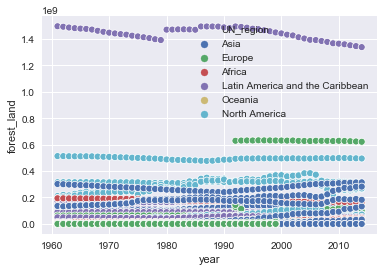

In [51]:
sns.scatterplot("year","forest_land",hue='UN_region',data=data)

In [52]:
la=data[data.UN_region=="Latin America and the Caribbean"]

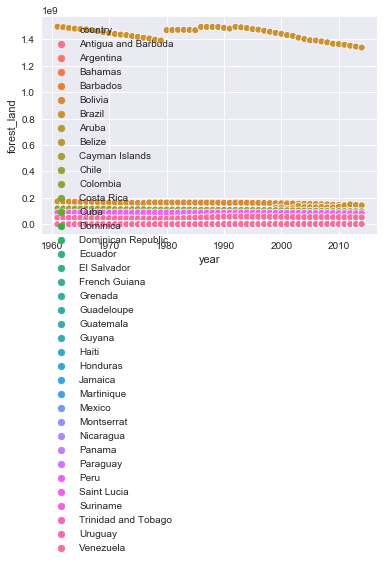

In [53]:
sns.scatterplot("year","forest_land",hue='country',data=la)

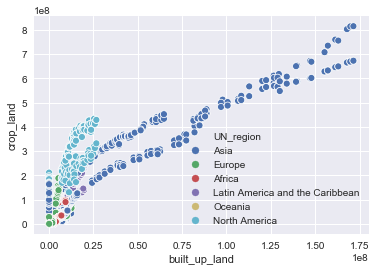

In [54]:
sns.scatterplot("built_up_land","crop_land",hue='UN_region',data=data)

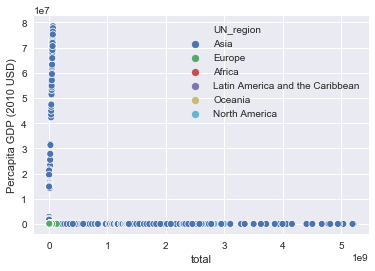

In [55]:
sns.scatterplot("total","Percapita GDP (2010 USD)",hue='UN_region',data=data)

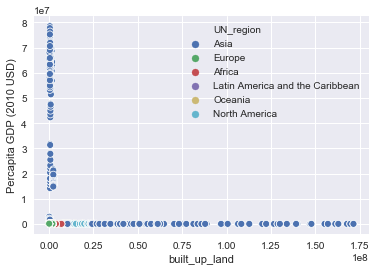

In [56]:
sns.scatterplot("built_up_land","Percapita GDP (2010 USD)",hue='UN_region',data=data)

In [57]:
from bubble_plot.bubble_plot import bubble_plot
from sklearn.datasets import load_boston
import seaborn as sns
sns.set_style("darkgrid")

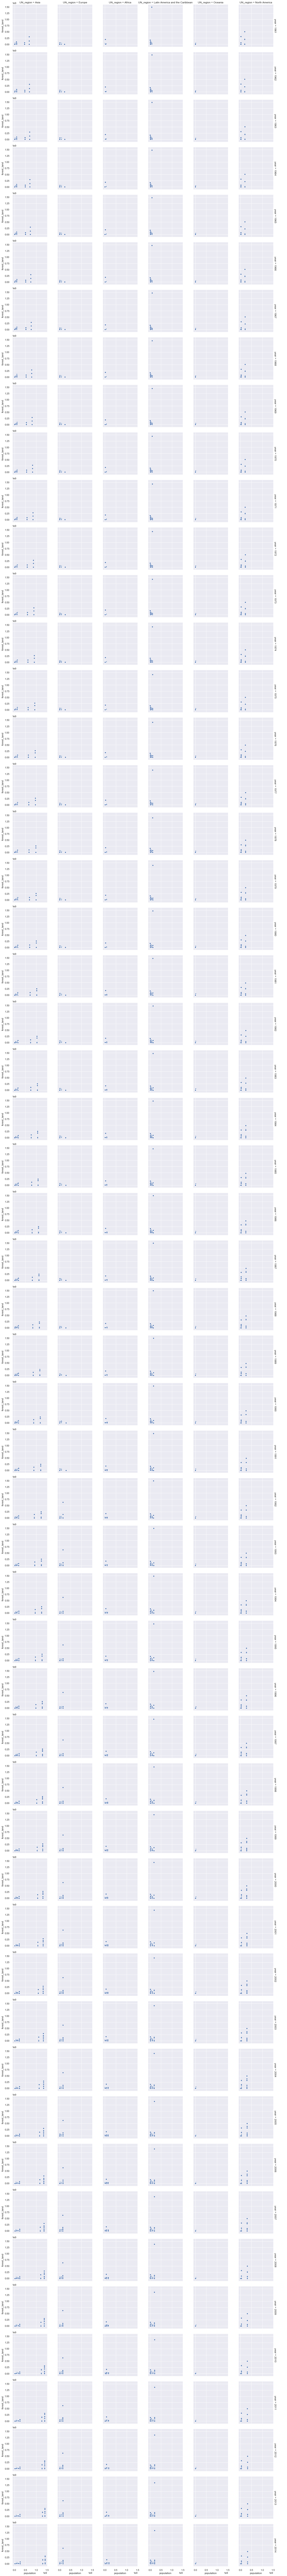

In [58]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(data, row="year", col="UN_region",margin_titles=True)

(g.map(plt.scatter, "population","forest_land", edgecolor="w")).add_legend()

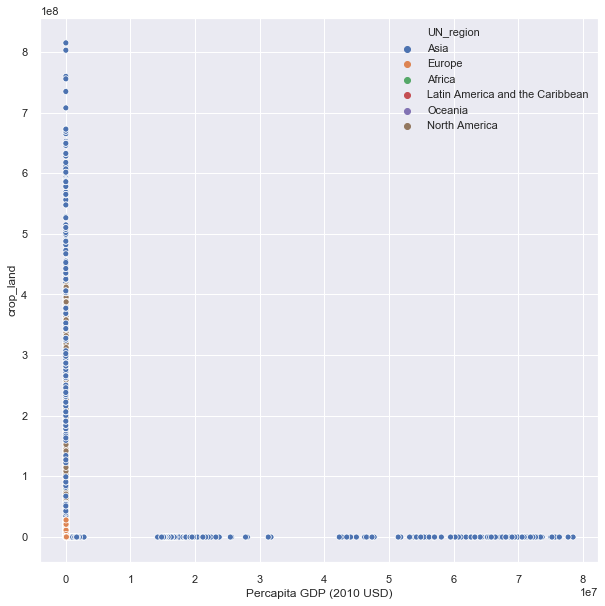

In [59]:
sns.set(rc={'figure.figsize':(10,10)})
#g = sns.FacetGrid(happiness, col="Region",  margin_titles=True, col_wrap=3)

#(g.map(plt.scatter, "Generosity","Happiness Score", edgecolor="w")).add_legend()
sns.scatterplot("Percapita GDP (2010 USD)","crop_land",hue='UN_region',data=data)

In [60]:
data[['country', 'Percapita GDP (2010 USD)','year']].sort_values(by = 'Percapita GDP (2010 USD)',ascending = False).head(10)

,country,Percapita GDP (2010 USD),year
41353,Korea,78489754.75,2008
41359,Korea,77720858.82,2008
41393,Korea,76366697.56,2012
41333,Korea,75950284.07,2006
41373,Korea,75700761.83,2010
41399,Korea,75223997.62,2012
41339,Korea,75144900.34,2006
41379,Korea,75045890.03,2010
41363,Korea,73701449.15,2009
41343,Korea,73563001.05,2007


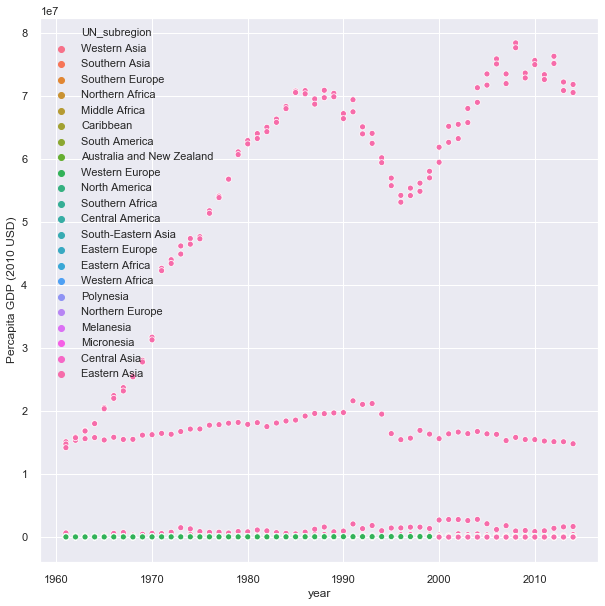

In [61]:
sns.scatterplot("year","Percapita GDP (2010 USD)",hue='UN_subregion',data=data)

In [62]:
ea=data[data.UN_subregion=="Eastern Asia"]

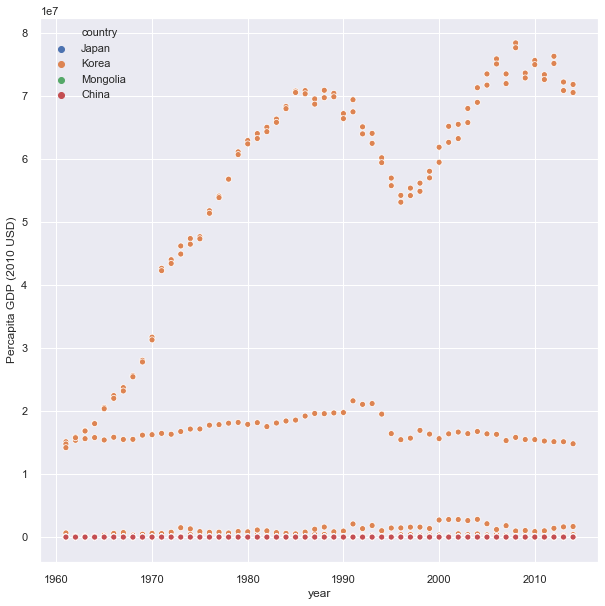

In [63]:
sns.scatterplot("year","Percapita GDP (2010 USD)",hue='country',data=ea)

In [64]:
korea=data[data.country=="Korea"]

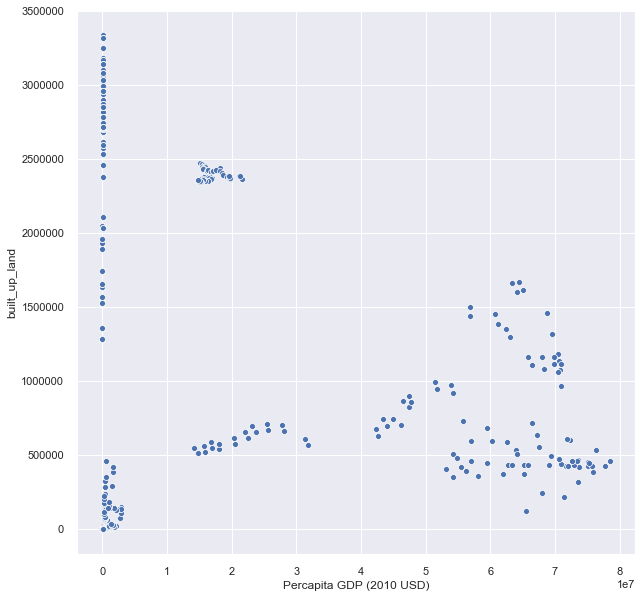

In [65]:
sns.scatterplot("Percapita GDP (2010 USD)","built_up_land",data=korea)